##### Librerias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression

# Imputación de nulos 

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None) #  poder visualizar todas las columnas de los DataFrames

pd.set_option('display.float_format', '{:.2f}'.format) # convierte los floar en otro formato con dos decimales.

#### Fase 1: Exploración y Limpieza

In [2]:
#Lectura del CSV y visualización de los 5 primeros. 
df_flight = pd.read_csv("./datos/customer_flight_activity.csv", index_col = 0)
df_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.00,0,0
100102,2017,1,10,4,14,2030,203.00,0,0
100140,2017,1,6,0,6,1200,120.00,0,0
100214,2017,1,0,0,0,0,0.00,0,0
100272,2017,1,0,0,0,0,0.00,0,0


In [3]:
#Lectura del CSV y visualización de los 5 primeros. 
df_loyalty = pd.read_csv("./datos/customer_loyalty_history.csv", index_col = 0)
df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


### Exploración Inicial

In [4]:
df_flight.shape

(405624, 9)

In [5]:
df_loyalty.shape

(16737, 15)

In [7]:
df_total = pd.merge(df_loyalty, df_flight, on="Loyalty Number", how="inner")
df_total.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38


In [9]:
# Analizamos los duplicados que tenemos en el dataframe. 

df_total.duplicated().sum()

1864

In [10]:
# Posicionamos el indice Loyalty Number como una columna en nuestro dataframe. 

df_total.reset_index(inplace=True)

In [12]:
df_total.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0


In [14]:
#Visualizar numero de filas y columnas , vemos que tenemos ahora 25 col. 
df_total.shape

(405624, 25)

In [15]:
# Creamos función exploratoria para ver todos los datos del dataframe en general y por columna.
# Veremos información general del df y más detalladamente para cada columna como : valores unicos , recuento de valores, % de nulos y resultados estadisticos. 

def explore_data(df):
    # Información general del dataframe
    print("Shape del dataframe:")
    print(df.shape)
    print("\nInformación del dataframe:")
    print(df.info())
    print("\nNombres de las columnas:")
    print(df.columns)
    
    # Duplicados
    print("\nDuplicados:")
    print(df[df.duplicated()])
    
    # Exploración de cada columna
    for columna in df.columns:
        print(f"\nColumna: {columna}")
        print("\nValores únicos:")
        print(df[columna].unique())
        print("\nConteo de valores:")
        print(df[columna].value_counts())
        print("\nPorcentaje de nulos:")
        print(df[columna].isnull().mean() * 100)
        print("\nDescripción:")
        print(df[columna].describe())

# Ejemplo de uso
explore_data(df_total)

Shape del dataframe:
(405624, 25)

Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 

In [52]:
# Resumen nulos
df_nulos = pd.DataFrame((df_total.isnull().sum() / df_total.shape[0]) * 100, columns = ["%_nulos"])
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
salary,25.33


##### Conclusiones tras la exploración inicial: 

-   Columnas : eliminaremos los espacios en blanco reemplazandolos por un guión bajo y pondremos el nombre en minusculas. 
-   Nulos : nos encontramos 3 columnas con % de nulos para analizar. Salary (25.31%), Cancellation Year y Cancelation Month (87.66%).
-   Duplicados : tenemos 1864 duplicados en nuestro dataframe mergeado. 
-   Salary : tiene valores negativos , ademas de los nulos. 
-   Unificar en 2 columnas : Enrollment Year	, Enrollment Month	,Cancellation Year y Cancellation Month.

##### Limpieza de datos

In [25]:
# Como hemos visto en la exploración teniamos 1864 duplicados. Procedemos a eliminarlos para no tener información adicional irrelevante. 

df_total2 = df_total.drop_duplicates()
df_total2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38


In [26]:
# Función limpiar columnas, espacios y a minusculas. 
def cleaning_columns(df):

    new_columns = [col.lower().replace(" ", "_") for col in df.columns]
    df.columns = new_columns
    return df

In [27]:
df_total2 = cleaning_columns(df_total2)

In [32]:
df_total2.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

In [29]:
meses = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df_total2["month"] = df_total2["month"].map(meses)

In [33]:
# Dado que el porcentaje de nulos en ambas es bastante alto pero no sabemos si es que no contestaron nunca los clientes y pueden seguir estando en la cia, los pondremos como desconocido.
cancellation_nan = ['cancellation_year', 'cancellation_month']

for columna in cancellation_nan:
    df_total2[columna].fillna('unkwown', inplace=True)

In [38]:
#Vamos a juntar las columnas , para dejar dos con los datos de fecha y año, y eliminaremos las que contienen la info separada.

def column_union(column1, column2):

    column1 = column1.astype(str)
    column2 = column2.astype(str)

    return column1 + '-' + column2


In [39]:
df_total2["enrollement_date"] = column_union(df_total2["enrollment_year"], df_total2["enrollment_month"])

In [40]:
df_total2["cancellation_date"] = column_union(df_total2["cancellation_year"], df_total2["cancellation_month"])

In [43]:
# Eliminaremos las 4 columnas que ahoa ya tenemos unificadas.df_total2
# Creamos una funcion para ello:

def remove_columns(df,column):
    return df.drop(columns=column)

list_to_remove = ["enrollment_year","enrollment_month","cancellation_year","cancellation_month"]
df_total2 = remove_columns(df_total2,list_to_remove)


In [44]:
df_total2.head(2)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,enrollement_date,cancellation_date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2017,January,0,0,0,0,0.00,0,0,2016-2,unkwown-unkwown
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2017,February,3,0,3,2823,282.00,0,0,2016-2,unkwown-unkwown


In [45]:
# Ver % nulos y valorar cambios.

df_total2.isnull().sum()[df_total2.isnull().sum() > 0] / df_total2.shape[0]

salary   0.25
dtype: float64

In [46]:
df_total2["salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [47]:
# Valores negativos en Salary , pasados a positivos con el abs().

df_total2['salary'] = df_total2['salary'].abs()


In [48]:
df_total2["salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970.,  57297.])

In [49]:
# Nulos Salary - 25% 

#Iterative 

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_total2[["salary"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado



array([[83236.],
       [83236.],
       [83236.],
       ...,
       [75049.],
       [75049.],
       [75049.]])

In [50]:
df_total2[["salary"]] = imputer_iterative_imputado

In [51]:
df_total2.describe()[["salary"]]

,salary
count,403760.00
mean,79371.73
std,30008.34
min,9081.00
25%,63901.00
50%,79371.73
75%,82940.00
max,407228.00


#### Fase 2: Visualización


In [53]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

monthly_data_flights = df_total2.groupby(['year', 'month'])['flights_booked'].sum().reset_index(name="flights_booked")
monthly_data_flights

,year,month,flights_booked
0,2017,April,55720
1,2017,August,78692
2,2017,December,77650
3,2017,February,47691
4,2017,January,47766
5,2017,July,89288
6,2017,June,80493
7,2017,March,64271
8,2017,May,65279
9,2017,November,56905


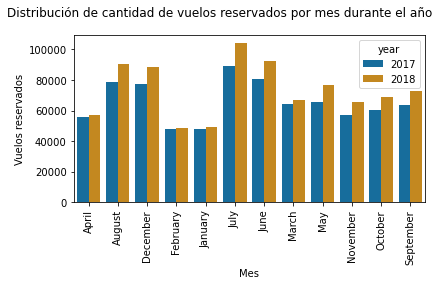

In [59]:
# Elegimos barplot para ver la distribucion entre una variable categorica y numerica. 

sns.barplot(x = "month", 
            y = "flights_booked", 
            data = monthly_data_flights, 
            hue = "year", 
            palette = "colorblind")


plt.suptitle("Distribución de cantidad de vuelos reservados por mes durante el año")
plt.xlabel("Mes")
plt.ylabel("Vuelos reservados")
plt.xticks(rotation = 90)
plt.tight_layout()

In [60]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? distance - points_accumulated

corr = df_total2["distance"].corr(df_total2["points_accumulated"])
print(corr)

# Coeficiente de correlación es cercano a 1, la relación es positiva. Mientras una variable aumenta, la otra también tiende a aumentar. 

0.9945458005650185


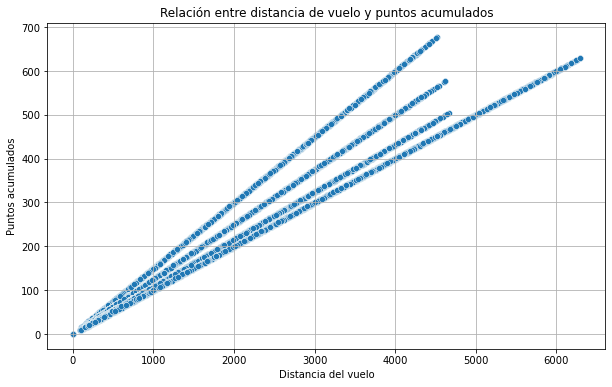

In [62]:
#Scatterplot : relación entre dos variables numericas.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=df_total2)
plt.title('Relación entre distancia de vuelo y puntos acumulados')
plt.xlabel('Distancia del vuelo')
plt.ylabel('Puntos acumulados')
plt.grid(True)
plt.show()

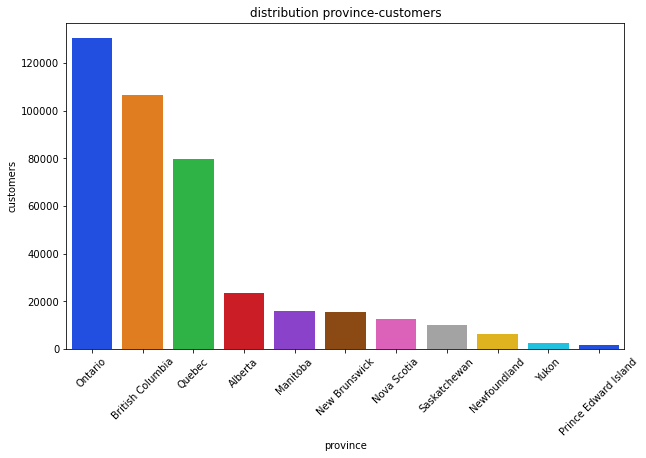

In [71]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado? province 

customers_province = df_total2['province'].value_counts().reset_index()

customers_province.columns = ["province","customers"]

plt.figure(figsize=(10, 6))
sns.barplot(data=customers_province, x='province', y='customers', palette='bright')
plt.title('distribution province-customers')
plt.xlabel('province')
plt.ylabel('customers')
plt.xticks(rotation=45)  
plt.show()

In [72]:
customers_province = customers_province.sort_values(by="customers",ascending= False)
customers_province.head()

,province,customers
0,Ontario,130258
1,British Columbia,106442
2,Quebec,79573
3,Alberta,23360
4,Manitoba,15900


In [110]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?  education- salary 

mean_salary_edu = df_join.groupby('education')['salary'].mean()
mean_salary_edu

education
Bachelor                72669.31
College                      NaN
Doctor                 178335.44
High School or Below    61126.64
Master                 103767.49
Name: salary, dtype: float64

In [111]:
college_df = df_join[df_join['education'] == 'College']
college_df 

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,month_num,date
24,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,Marzo,NaN,NaN,2017,Enero,9,1,10,1860,186.00,0,0,NaN,NaT
25,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,Marzo,NaN,NaN,2017,Febrero,9,0,9,2043,204.00,0,0,NaN,NaT
26,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,Marzo,NaN,NaN,2017,Marzo,14,0,14,2002,200.00,0,0,NaN,NaT
27,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,Marzo,NaN,NaN,2017,Abril,0,0,0,0,0.00,0,0,NaN,NaT
28,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,Marzo,NaN,NaN,2017,Mayo,16,0,16,3056,305.00,0,0,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405571,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,Marzo,NaN,NaN,2018,Julio,4,4,8,3640,364.00,0,0,NaN,NaT
405572,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,Marzo,NaN,NaN,2018,Agosto,6,0,6,1890,189.00,0,0,NaN,NaT
405573,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,Marzo,NaN,NaN,2018,Septiembre,0,0,0,0,0.00,0,0,NaN,NaT
405574,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,Marzo,NaN,NaN,2018,Noviembre,11,0,11,2552,255.00,0,0,NaN,NaT


In [112]:
# El 100% de los datos de salary para el nivel educativo college , son nulos. 
null_salary_count = college_df['salary'].isnull().sum()
null_salary_count

102672

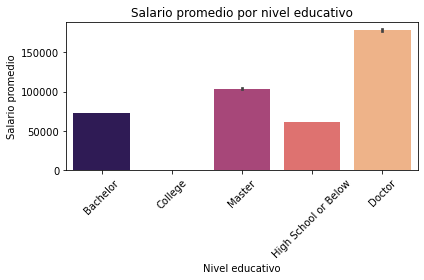

In [62]:
sns.barplot(x = "education", 
            y = "salary", 
            data = df_join,
            palette = "magma")

plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

In [67]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?  loyalty_card

proporcion = df_join["loyalty_card"].value_counts()
porcentaje_clientes_fidelidad = (proporcion / len(df_join)) * 100
porcentaje_clientes_fidelidad


Star     45.42
Nova     33.92
Aurora   20.67
Name: loyalty_card, dtype: float64

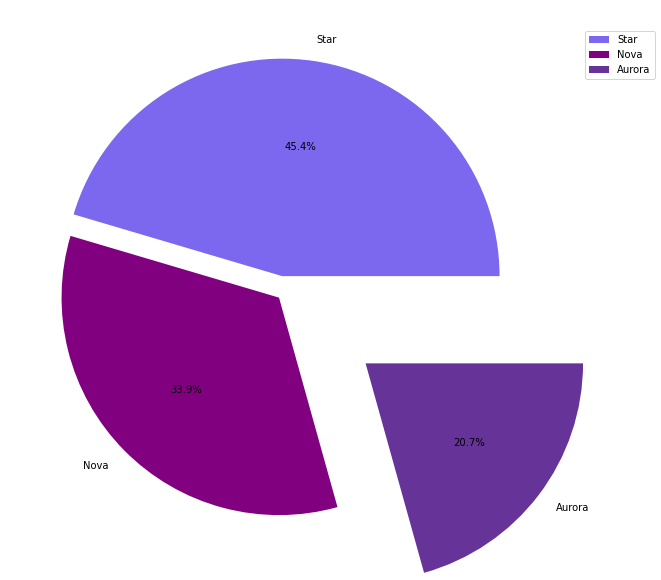

In [81]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet' ,'indigo']

explode = (0.1,0, 0.5) 

plt.figure(figsize=(10,10))
plt.pie(proporcion, labels=proporcion.index, autopct='%1.1f%%',colors = colors, explode = explode)
plt.title("Porcentaje clientes según tarjeta de fidelidad", color = "white", fontsize = 16, fontweight = "bold") 
plt.legend(bbox_to_anchor=(1.2, 1)) 
plt.show();

In [82]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? gender - marital_status

gender_marital = df_join.groupby(['gender', 'marital_status']).size().reset_index()
gender_marital

,gender,marital_status,0
0,Female,Divorced,30888
1,Female,Married,117816
2,Female,Single,54936
3,Male,Divorced,30288
4,Male,Married,117984
5,Male,Single,53712


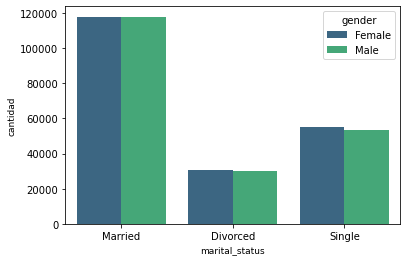

In [83]:
sns.countplot(x = "marital_status", 
              data = df_join, 
              palette = "viridis", 
              hue = "gender")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("marital_status", fontsize = 9)
plt.ylabel("cantidad",  fontsize = 9); 

### Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

##### 1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [29]:
df_total2["flights_booked"].astype(int)

0         0
1         3
2         0
3         0
4         6
         ..
405619    0
405620    0
405621    0
405622    0
405623    0
Name: flights_booked, Length: 403760, dtype: int64

In [30]:
df_total2["flights_booked"].dtype

dtype('int64')

In [31]:
df_filtered = df_total2[["flights_booked", "education"]]
df_filtered

,flights_booked,education
0,0,bachelor
1,3,bachelor
2,0,bachelor
3,0,bachelor
4,6,bachelor
...,...,...
405619,0,bachelor
405620,0,bachelor
405621,0,bachelor
405622,0,bachelor


In [32]:
df_filtered["flights_booked"].unique()

array([ 0,  3,  6, 13, 12,  8, 14,  2,  1,  7, 15,  4,  9, 16, 11,  5, 10,
       17, 18, 19, 20, 21])

#### 2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.

In [33]:
stadistics = df_filtered.groupby("education")["flights_booked"].describe()
display(stadistics)

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
college,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
high school or below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


#### 3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

In [43]:
df_total2 = df_total2.dropna()

In [44]:
from scipy.stats import shapiro

In [45]:
datos_vuelos_reservados = df_filtered['flights_booked']
estadistico_vuelos, p_valor_vuelos = shapiro(datos_vuelos_reservados)

print("Para la columna 'flights_booked':")
print("Estadístico de prueba:", estadistico_vuelos)
print("Valor p:", p_valor_vuelos)

if p_valor_vuelos > 0.05:
    print("Los datos de 'Flights Booked' parecen seguir una distribución normal.")
else:
    print("Los datos de 'Flights Booked' no parecen seguir una distribución normal.")

Para la columna 'flights_booked':
Estadístico de prueba: 0.7893524765968323
Valor p: 0.0
Los datos de 'Flights Booked' no parecen seguir una distribución normal.


In [46]:
bachelor = df_filtered[df_filtered[["education"]] == "bachelor"]["flights_booked"]
college = df_filtered[df_filtered[["education"]] == "college"]["flights_booked"]
doctor = df_filtered[df_filtered[["education"]] == "doctor"]["flights_booked"]
high_school = df_filtered[df_filtered[["education"]] == "high school or below"]["flights_booked"]
master = df_filtered[df_filtered[["education"]] == "master"]["flights_booked"]

In [47]:
# def homogeneidad (dataframe, columna, columna_metrica):
    
#     """
#     Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

#     Parámetros:
#     - dataframe (DataFrame): El DataFrame que contiene los datos.
#     - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
#     - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

#     Returns:
#     No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
#     Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
#     se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
#     """
    
#     # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
#     valores_evaluar = []
    
#     for valor in dataframe[columna].unique():
#         valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

#     statistic, p_value = stats.levene(*valores_evaluar)
#     if p_value > 0.05:
#         print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
#     else:
#         print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [52]:
from scipy import stats

def homogeneidad(dataframe, columna, columna_metrica):
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        # Filtrar NaNs y obtener solo los valores numéricos para evitar problemas
        datos_grupo = dataframe[(dataframe[columna] == valor) & (~dataframe[columna_metrica].isnull())][columna_metrica]
        valores_evaluar.append(datos_grupo)
    
    if len(valores_evaluar) < 2:
        print("No hay suficientes grupos para realizar el test de Levene.")
        return
    
    statistic, p_value = stats.levene(*valores_evaluar)
    
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica}, las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

homogeneidad(df, 'grupo', 'columna_metrica')

TypeError: homogeneidad() takes 3 positional arguments but 5 were given

In [51]:
metricas = [bachelor, college,doctor,high_school,master]

for metrica in metricas:
    homogeneidad(df_filtered ,'flights_booked', metrica)

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=403760)] are in the [columns]"

In [28]:
from scipy.stats import mannwhitneyu

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos

# Separar los datos en dos grupos basados en la columna 'Education'
bachelor = df_filtered[df_filtered[["education"]] == "bachelor"]["flights_booked"]
college = df_filtered[df_filtered[["education"]] == "college"]["flights_booked"]
doctor = df_filtered[df_filtered[["education"]] == "doctor"]["flights_booked"]
high_school = df_filtered[df_filtered[["education"]] == "high school or below"]["flights_booked"]
master = df_filtered[df_filtered[["education"]] == "master"]["flights_booked"]

# Realizar el test de Mann-Whitney
resultado_mannwhitneyu = mannwhitneyu(bachelor, college,doctor,high_school,master)

# Imprimir el resultado
print("Valor p del test de Mann-Whitney U:", resultado_mannwhitneyu.pvalue)

if resultado_mannwhitneyu.pvalue < 0.05:
    print("Hay una diferencia significativa entre las distribuciones de los dos grupos.")
else:
    print("No hay una diferencia significativa entre las distribuciones de los dos grupos.")


ValueError: `x` and `y` must not contain NaNs.